In [17]:
from sklearn import datasets

X_df, y_df = datasets.load_wine(return_X_y=True, as_frame=True)
X, y = X_df.to_numpy(), y_df.to_numpy()

### Normalize *data*

In [18]:
import numpy as np

X = (X - X.mean()) / X.std()
print(f"X shape:{X.shape}")
ones = np.ones(X.shape[0])
X = np.c_[ones, X]
print(f"X shape:{X.shape}")

X shape:(178, 13)
X shape:(178, 14)


In [19]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

In [25]:
from sklearn.metrics import accuracy_score
from scipy.special import softmax

class LogisticRegression():

  def __init__(self, lr=0.01, epochs=5000):
    self._train_accuracies = []
    self._losses = []
    self.lr = lr
    self.epochs = epochs

  def predict(self, X):
    Z = -X@self._weights
    y = softmax(Z, axis=1)
    return np.argmax(y, axis=1)


  def fit(self, X, y, mu=0.01):
    y_oneshot = onehot_encoder.fit_transform(y.reshape(-1,1))
    print(f"y_oneshot shape:{y_oneshot.shape}")
    print(f"y_oneshot[0]:{y_oneshot[0]}")
    self._weights = np.zeros((X.shape[1], y_oneshot.shape[1]))
    print(f"self._weights shape: {self._weights.shape}")

    for _ in range(self.epochs):
      #X_dot_weights = np.dot(self._weights, X.T)
      Z = -X@self._weights
      y_predictions = softmax(Z, axis=1)
      loss = self._compute_loss(X, y_oneshot)
      weights_derivative = self._compute_gradients(X, y_oneshot, mu)
      self._update_model_parameters(weights_derivative)

      self._train_accuracies.append(accuracy_score(y, np.argmax(y_predictions, axis=1)))
      self._losses.append(loss)

  def _compute_loss(self, X, y):
      """
      y: onehot encoded
      """
      Z = - X @ self._weights
      N = X.shape[0]
      loss = 1/N * (np.trace(X @ self._weights @ y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
      return loss

  def _compute_gradients(self, X, y, mu):
    """
      y: onehot encoded
    """
    Z = - X @ self._weights
    y_predictions = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (y - y_predictions)) + 2 * mu * self._weights
    return gd

  def _update_model_parameters(self, weights_derivative):
    self._weights -= self.lr * weights_derivative

In [26]:
model = LogisticRegression()
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


y_oneshot shape:(178, 3)
y_oneshot[0]:[1. 0. 0.]
self._weights shape: (14, 3)


In [32]:
print(model._losses[0])
print(model._train_accuracies[900])

1.0986122886681096
0.6853932584269663


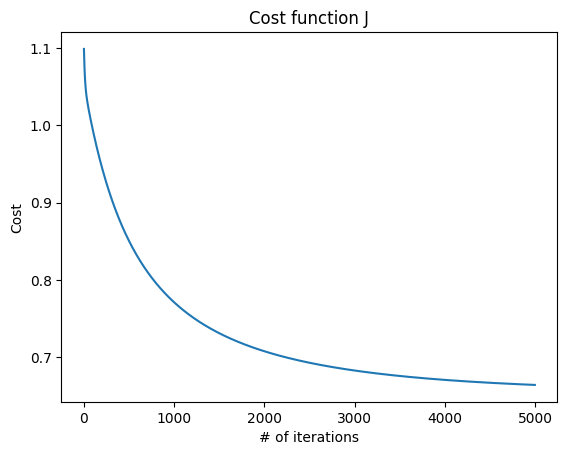

In [28]:
from matplotlib import pyplot as plt

plt.title('Cost function J')
plt.xlabel('# of iterations')
plt.ylabel('Cost')
plt.plot(model._losses)
plt.show()


In [29]:
print(model.predict(X[:5]))

[0 0 0 0 1]


In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class="multinomial", random_state=0).fit(X, y)
print(clf.predict(X[:5]))
clf.score(X, y)

[0 0 0 0 2]


0.6966292134831461